In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline

# windows size in years for the moving average (e.g. average is calculated over 5 years)
WINDOW_SIZE=5
# file name of the data if already downloaded, leave as None to download it from NASA directly
FILE_NAME=None

# get the data
if FILE_NAME is None:
    raw_data = urllib.request.urlopen("https://ozonewatch.gsfc.nasa.gov/meteorology/figures/ozone/to3area_0907-1013_toms+omi+omps.txt").read().decode("utf-8")
else:
    with open(FILE_NAME, "r") as f:
        raw_data = f.read()

# parse the data
years, areas = [], []
for line in raw_data.splitlines():
    m = re.search('^(\d+)\s+(\S*)\s+(\S*)\s+(\S*)', line)
    if m is None: continue
    matches = m.groups()
    if len(matches) != 4: continue
    year = int(matches[0])
    # 1 - Data, 2 - Minimum, 3 - Maximum
    data = [float(matches[1]), float(matches[2]), float(matches[3])]
    if data[0] > -9000.0:
        years.append(year)
        areas.append(data)
            
years = np.array(years)
areas = np.transpose(np.array(areas))

# calculate moving avg
avgs = np.array([
    np.convolve(areas[0], np.ones(WINDOW_SIZE)/WINDOW_SIZE, 'valid'),
    np.convolve(areas[1], np.ones(WINDOW_SIZE)/WINDOW_SIZE, 'valid'),
    np.convolve(areas[2], np.ones(WINDOW_SIZE)/WINDOW_SIZE, 'valid')
])

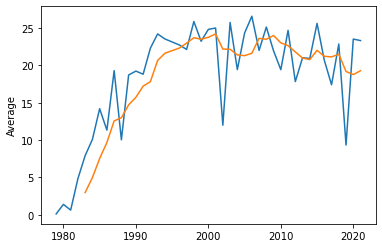

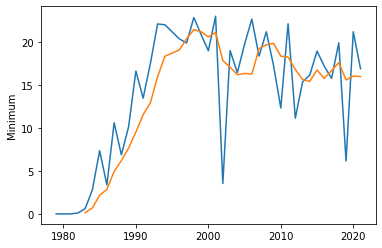

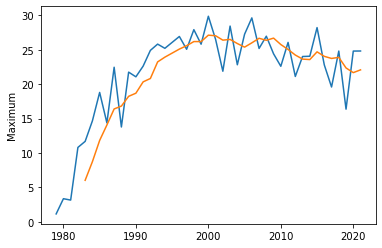

In [2]:
plt.ylabel('Average')
plt.plot(years, areas[0], years[WINDOW_SIZE-1:], avgs[0])
plt.show()
plt.ylabel('Minimum')
plt.plot(years, areas[1], years[WINDOW_SIZE-1:], avgs[1])
plt.show()
plt.ylabel('Maximum')
plt.plot(years, areas[2], years[WINDOW_SIZE-1:], avgs[2])
plt.show()